# Лабораторная работа №6

## Метод сеток решения волнового уравнения

### Вариант 17

***Задание 1.*** Рассчитать колебания $u(x,t)$. 

Продольные колебания $u(x,t)$ тяги описываются уравнением
$$ \frac{\partial^2u}{\partial t^2} - \frac{\rho}{E}\frac{\partial^2u}{\partial x^2} = 0, 0<x<L, $$
$$ u(0,t)=0, u(L,t)=0, 0 \le t \lt T,$$

где $E$ - модуль упругости; $\rho$ - плотность материала стержня.

Тяга имеет длину $L$ и закреплена на концах. Захватив тягу в центре, ее деформируют так, что продольное перемещение становиться равным $\Delta u$:
$$u(x,0) = -\frac{\rho}{E}\frac{\partial^2u}{\partial x^2}$$
Затем тяга освобождается.

Рассчитайте колебания $u(x,t)$ при заданных параметрах.

***Задание 2.*** Рассчитать колебания тонкой пластины

Колебания тонкой пластины без учета потерь на трение описываются нормированным волновым уравнением вида 

$$ \frac{\partial^2u}{\partial t^2} - (\frac{\partial^2u}{\partial x^2} + \frac{\partial^2u}{\partial y^2}) = 0, \ 0 \le t \le T,\ -\frac a 2 \le x \le \frac a 2,\ -\frac b 2 \le y \le \frac b 2$$

где $u(x,y,t)$ - деформация пластины; $x, y$ - координаты; $t$ - время.

Рассчитать колебания пластины при заданных размерах $a$ и $b$, граничных $\Gamma_1, \Gamma_2, \Gamma_3, \Gamma_4$, и начальных $u(x,y,0)$ и $\frac{\partial u(x,y,0)}{\partial t}$ условиях.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Задание 1

Дано уравнение 
$$
\frac {\partial^2 u}{\partial t^2} = \frac{E}{\rho}\frac {\partial^2 u}{\partial x^2},\ 0\le t \le T,\ 0 \le x\le L 
$$

Со следующими начальными и граничными условиями:
$$
u(0, x) = p(x),\ \frac {\partial u(0, x)}{\partial t} = q(x),\ u(t, 0) = 0,\ u(t, L) = 0
$$

Аппроксимируем вторую производную следующей схемой
$$
\frac {\partial^2 u}{\partial x^2} = \frac {u(x+h) - 2\cdot u(x) + u(x-h)}{h^2}
$$

Формулы для расчетов следующие:

$
u_{j}^0 = p_{j}; 
$

$
u_{j}^1 = u_{j}^0 + \tau \cdot \frac {\partial u_{j}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j}^0}{\partial t^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 E}{2\cdot \rho} \frac {\partial^2 u_j}{\partial x^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 E}{2\cdot h_x^2 \rho} (p_{j+1} - 2\cdot p_j + p_{j-1});
$

$
\frac {(u_{j}^{i+1} - 2\cdot u_j^i + u_{j}^{i-1})}{\tau^2} = \frac{E}{\rho} \frac {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)}{h_x^2}
$, отсюда получаем:

$
u_{j}^{i+1} = \frac{\tau^2 E}{\rho h_x^2} {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)} + 2\cdot u_j^i - u_{j}^{i-1};
$

Порядок точности второй и по $h_x$, и по  $\tau$.


Тогда получим:
$$\frac {(u_{j}^{i+1} - 2\cdot u_j^i + u_{j}^{i-1})}{\tau^2} = \frac{\rho}{E} \frac {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)}{h^2}
$$
Выражаем отсюда $u_{j}^{i+1}$:
$$
u_{j}^{i+1} = \frac{ \rho \tau^2}{E h^2} {(u_{j+1}^i - 2\cdot u_j^i + u_{j-1}^i)} + 2\cdot u_j^i - u_{j}^{i-1};
$$

Получили явную трехслойную схему с шаблоном: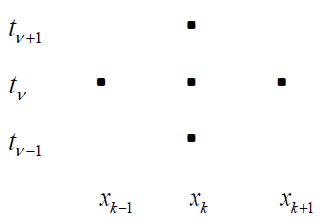

Тогда, учитывая начальные и граничные условия:

$$
u(x, 0) = p(x),\ \frac {\partial u(x, 0)}{\partial t} = q(x),\ u(0, t)= 0,\ u(L, t) = 0
$$

аппроксимируя которые, получаем:
$$u_{j}^0 = p_{j} $$
$$
u_{j}^1 = u_{j}^0 + \tau \cdot \frac {\partial u_{j}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j}^0}{\partial t^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 \rho}{2\cdot E} \frac {\partial^2 u_j}{\partial x^2} = p_{j} + \tau \cdot q_{j} + \frac {\tau^2 \rho}{2\cdot h^2 E} (p_{j+1} - 2\cdot p_j + p_{j-1})
$$

можем решить задачу.

In [2]:
# C = E / rho
def solve(p, q, C, L, N_X, tau, T = None):
    x = np.linspace(0, L, N_X)
    h_x = x[1] - x[0]
    
    n = 0
    solution_prev_prev = np.zeros(N_X)
    solution_prev_prev[1:-1] = p(x[1:-1])
    yield solution_prev_prev
    
    n += 1
    solution_prev = np.zeros(N_X)
    solution_prev[1:-1] = tau * q(x) + p(x[1:-1]) + tau ** 2 * C / (2 * h_x ** 2) * \
                          (p(x[2:]) - 2 * p(x[1:-1]) + p(x[:-2]))
    yield solution_prev
    
    n += 1
    while T is None or n*tau <= T:
        solution = np.zeros(N_X)
        solution[1:-1] = C * ((tau / h_x) ** 2) * (solution_prev[2:] - 2*solution_prev[1:-1] + solution_prev[:-2]) + \
                         2*solution_prev[1:-1] - solution_prev_prev[1:-1]
        yield solution
        
        n += 1
        solution_prev_prev = solution_prev
        solution_prev = solution
        

In [3]:
L = 18
delta_u = 0.2
# p = lambda x: -4 * delta_u / (L ** 2) * x ** 2  + 4*delta_u / L * x
p = lambda x: - np.fabs((x-L/2)*2*delta_u / L) + delta_u
q = lambda x: 0
rho = 5.9e5
E = 120e9

x = np.linspace(0, L, 100)
y = list(solve(p, q, E / rho, L, 100, 1e-4, 1e-1))

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


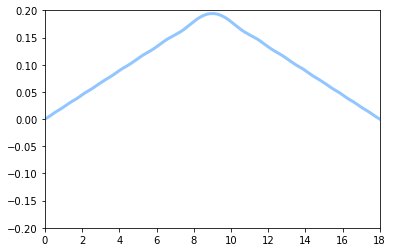

In [8]:
plt.style.use('seaborn-pastel')
fig = plt.figure()
ax = plt.axes(xlim=(0, 18), ylim=(-0.2, 0.2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, y[i % len(y)])
    return line,
 
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=800, interval=10, blit=True)
  

anim.save('animation.gif', writer='PillowWriter', fps=2)


In [10]:
L = 18
u = 0.2
E = 120e9
rho = 5.9e3
p = lambda x: -4 * u / (L ** 2) * x ** 2  + 4 * u / L * x 
q = lambda x: 0 
NK = 100
h = L / NK
c = 0.0001
t = c * h
NT = 400

In [11]:
def solve1():
    M = np.zeros(shape=(NT, NK))
    X = np.linspace(0, L, NK)
    M[0, :] = np.array([p(i) for i in np.linspace(0, L, NK)])
    M[:, 0] = np.array([0 for i in np.linspace(0, u, NT)])
    M[:, -1] = np.array([0 for i in np.linspace(0, u, NT)])
    M[1, 1:-1] = t * q(X[1:-1]) + p(X[1:-1]) + t ** 2 * E / (2 * rho * h ** 2) * (p(X[2:]) - 2 * p(X[1:-1]) + p(X[:-2]))
    
    for i in range(2, NT):
        M[i, 1:-1] = (t ** 2 * E) / (rho * h ** 2) * (M[i-1, 2:] - 2 * M[i-1, 1:-1] + M[i-1, :-2]) + 2 * M[i-1, 1:-1] - M[i-2, 1:-1]
    return M

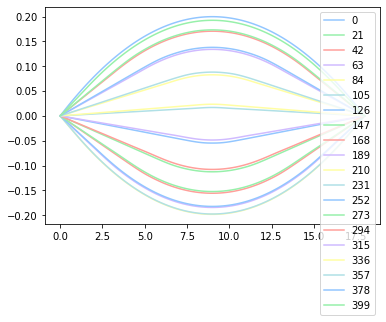

In [13]:
matrix = solve1()
X = np.linspace(0, L, NK)

for i in range(0, NT, NT//19):
    plt.plot(X, matrix[i], label=i)
plt.legend()
plt.show()

## Задание 2

Дано волновое уравнение
$$
\frac {\partial^2 u}{\partial t^2} = (\frac {\partial^2 u}{\partial x^2} + \frac {\partial^2 u}{\partial y^2}),\ 0 \le t \le T,\ -\frac a 2 \le x \le \frac a 2,\ -\frac b 2 \le y \le \frac b 2
$$

Со следующими начальными и граничными условиями:
$
u(0, x, y) = p(x, y),\ \frac {\partial u(0, x, y)}{\partial t} = q(x, y),\ u(t, -\frac a 2 , y) = 0,\ u(t, \frac a 2 , y) = 0,\ \frac {\partial u(t, x, -\frac b 2 )}{\partial y} = 0,\ \frac {\partial u(t, x, \frac b 2 )}{\partial y} = 0
$

Аппроксимируем вторую производную следующей схемой
$
\frac {\partial^2 u}{\partial x^2} = \frac {u(x+h) - 2\cdot u(x) + u(x-h)}{h^2}
$

Формулы для расчетов следующие:

$
u_{j,k}^0 = p_{j,k}; 
$

$
u_{j,k}^1 = u_{j,k}^0 + \tau \cdot \frac {\partial u_{j,k}^0}{\partial t} + \frac {\tau^2}{2} \frac {\partial u_{j,k}^0}{\partial t^2} = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {\partial^2 u_{j,k}}{\partial x^2} + \frac {\partial^2 u_{j,k}}{\partial y^2}) = p_{j, k} + \tau \cdot q_{j, k} + \frac {\tau^2}{2} (\frac {p_{j+1, k} - 2\cdot p_{j, k} + p_{j-1, k}} {h_x^2} + \frac {p_{j, k+1} - 2\cdot p_{j, k} + p_{j, k-1}} {h_y^2});
$

$
\frac {u^{i+1}_{j,k} - 2\cdot u^i_{j,k} + u^{i-1}_{j,k}}{\tau ^2} = \frac{u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}}{h_x^2} + \frac{u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}}{h_y^2}
$, отсюда получаем:

$
u^{i+1}_{j,k} = \frac{\tau^2}{h_x^2} (u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}) + \frac{\tau^2}{h_y^2} (u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}) + 2\cdot u^i_{j,k} - u^{i-1}_{j,k};
$

$
u_{j,K}^i = u_{j,K-1}^i;
$

$
u_{j,0}^i = u_{j,1}^i;
$

Аппроксимируем вторые производные следующими схемами:
$$ \frac {\partial^2 u}{\partial x^2} = \frac {u(x+h,y, t) - 2u(x,y, t) + u(x-h,y, t)}{h^2} $$
$$ \frac {\partial^2 u}{\partial y^2} = \frac {u(x,y+h, t) - 2u(x,y, t) + u(x,y-h, t)}{h^2} $$
$$ \frac {\partial^2 u}{\partial t^2} = \frac {u(x, y, t+\tau) - 2u(x,y, t) + u(x,y, t-\tau)}{t^2} $$

Тогда получим:
$$
\frac {u^{i+1}_{j,k} - 2\cdot u^i_{j,k} + u^{i-1}_{j,k}}{\tau ^2} = \frac{u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}}{h_x^2} + \frac{u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}}{h_y^2}
$$

Выражем отсюда $u^{i+1}_{j,k} $:

$$
u^{i+1}_{j,k} = \frac{\tau^2}{h_x^2} (u^{i}_{j+1, k} - 2\cdot u^i_{j,k} + u^{i}_{j-1, k}) + \frac{\tau^2}{h_y^2} (u^{i}_{j, k+1} - 2\cdot u^i_{j,k} + u^{i}_{j, k-1}) + 2\cdot u^i_{j,k} - u^{i-1}_{j,k};
$$

Имеем следующие граничные и начальные условия:
$$
u(x, y, 0) = p(x, y),\ \frac {\partial u( x, y, 0)}{\partial t} = q(x, y),\ u( -\frac a 2 , y, t) = 0,\ u( \frac a 2 , y, t) = 0,\ \frac {\partial u( x, -\frac b 2 ,t)}{\partial y} = 0,\ \frac {\partial u( x, \frac b 2 ,t)}{\partial y} = 0
$$

А также начальные и граничые равенства для схемы:

$$
u_{j,k}^0 = p_{j,k}; 
$$

$$
u_{j,K}^i = u_{j,K-1}^i;
$$

$$
u_{j,0}^i = u_{j,1}^i;
$$

In [14]:
def solve2(a, b, p, q, N_X, N_Y, tau, T = None):
    x = np.array([np.linspace(-a/2, a/2, N_X)])
    y = np.array([np.linspace(-b/2, b/2, N_Y)]).T
    h_x = x[0, 1] - x[0, 0]
    h_y = y[1, 0] - y[0, 0]
    
    n = 0
    solution_prev_prev = np.zeros((N_X, N_Y))
    print(p(x, y[1:-1]).shape)
    solution_prev_prev[1:-1, :] = p(x, y[1:-1])
    print(solution_prev_prev)
    yield solution_prev_prev
    
    n += 1
    solution_prev = np.zeros((N_X, N_Y))
    solution_prev[1:-1, 1:-1] = p(x[:, 1:-1], y[1:-1]) + tau * q(x[:, 1:-1], y[1:-1]) + \
                                (tau / h_x) ** 2 / 2 * (p(x[:, 2:], y[1:-1]) - 2*p(x[:, 1:-1], y[1:-1]) + p(x[:, :-2], y[1:-1])) + \
                                (tau / h_y) ** 2 / 2 * (p(x[:, 1:-1], y[2:]) - 2*p(x[:, 1:-1], y[1:-1]) + p(x[:, 1:-1], y[:-2]))
    solution_prev[0, 1:-1] = solution_prev[1, 1:-1]
    solution_prev[-1, 1:-1] = solution_prev[-2, 1:-1]
    yield solution_prev
    
    n += 1
    while T is None or n*tau <= T:
        solution = np.zeros((N_X, N_Y))
        solution[1:-1, 1:-1] = (tau / h_x) ** 2 * (solution_prev[2:, 1:-1] - 2*solution_prev[1:-1, 1:-1] + solution_prev[:-2, 1:-1]) + \
                               (tau / h_y) ** 2 * (solution_prev[1:-1, 2:] - 2*solution_prev[1:-1, 1:-1] + solution_prev[1:-1, :-2]) + \
                               2*solution_prev[1:-1, 1:-1] - solution_prev_prev[1:-1, 1:-1]
        solution[0] = solution[1]
        solution[-1] = solution[-2]
        yield solution
        
        n += 1
        solution_prev_prev = solution_prev
        solution_prev = solution

In [15]:
a = 2
b = 1
p = lambda x, y: np.arctan(np.cos(np.pi*x/a))
q = lambda x, y: np.sin(2*np.pi*x/a)*np.sin(2*np.pi*y/b)

n_x = 100
n_y = 100

(1, 100)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 ...
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


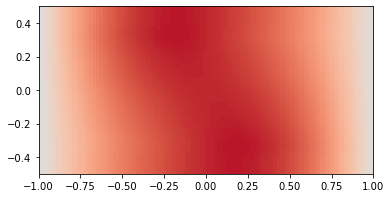

In [17]:
fig = plt.figure()

x = np.linspace(-a/2, a/2, n_x)
y = np.linspace(-b/2, b/2, n_y).reshape(-1, 1)

extent = -a/2, a/2, -b/2, b/2
ims = []
for i in solve2(a, b, p, q, n_x, n_y, 0.001, 4):
    ims.append([plt.imshow(i, animated=True, cmap=plt.cm.coolwarm, vmin=-.84, vmax=.84, extent=extent)])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=100)

ani.save('animation2.gif', writer='PillowWriter', fps=2)

In [18]:
max_ = 0
min_ = 0
for i in solve2(a, b, p, q, n_x, n_y, 0.001, 4):
    max_ = max(max_, i.max())
    min_ = min(min_, i.min())
print(max_, min_)

(1, 100)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 ...
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [6.12323400e-17 3.17172935e-02 6.33390814e-02 ... 6.33390814e-02
  3.17172935e-02 6.12323400e-17]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0.8224910124947201 -0.8559637157128392


In [19]:
# variant 19 -> 19 mod 6 + 1 = 2

a = 2
b = 1
p = lambda x, y: np.arctan( np.cos(np.pi * x / a) )
q = lambda x, y: np.sin(2 * np.pi * x / a) * np.sin(2 * np.pi * y / b)
NX = 100
NY = 100
hx = a / NX
hy = b / NY
t = 0.001
NT = 10000

In [20]:
def solve2():
    MOM = np.zeros(shape=(NT, NX, NY))
    X = np.array([np.linspace(-a/2, a/2, NX)]).T
    Y = np.array([np.linspace(-b/2, b/2, NY)])
    MOM[0, 1:-1, :] = p(X[1:-1],Y)
    MOM[1, 1:-1, 1:-1] = p(X[1:-1], Y[:, 1:-1]) + t * q(X[1:-1], Y[:, 1:-1]) + (t / hx) ** 2 / 2 * (p(X[2:], Y[:, 1:-1]) - 2*p(X[1:-1], Y[:, 1:-1]) + p(X[:-2], Y[:, 1:-1])) + (t / hy) ** 2 / 2 * (p(X[1:-1], Y[:, 2:]) - 2*p(X[1:-1], Y[:, 1:-1]) + p(X[1:-1], Y[:, :-2]))
    MOM[1, 1:-1, 0] = MOM[1, 1:-1, 1]
    MOM[1, 1:-1, -1] = MOM[1, 1:-1, -2]
    
    for i in range(2, NT):
        MOM[i, 1:-1, 1:-1] = (t / hx)**2 * (MOM[i-1, 2:, 1:-1] - 2 * MOM[i-1, 1:-1, 1:-1] + MOM[i-1, :-2, 1:-1]) + (t / hy)**2 * (MOM[i-1, 1:-1, 2:] - 2 * MOM[i-1, 1:-1, 1:-1] + MOM[i-1, 1:-1, :-2]) + 2 * MOM[i-1, 1:-1, 1:-1] - MOM[i-2, 1:-1, 1:-1]
        MOM[i, 1:-1, 0] = MOM[i, 1:-1, 1]
        MOM[i, 1:-1, -1] = MOM[i, 1:-1, -2]
        
    return MOM

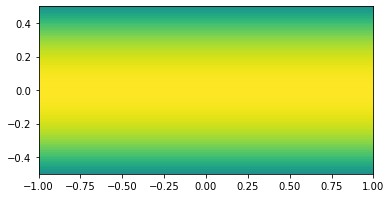

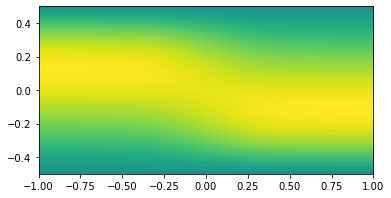

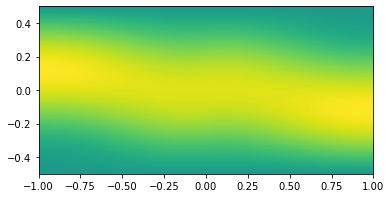

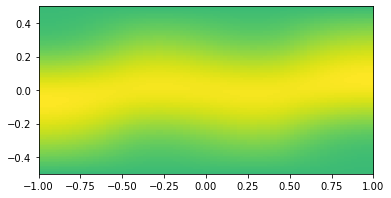

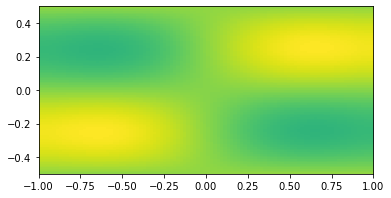

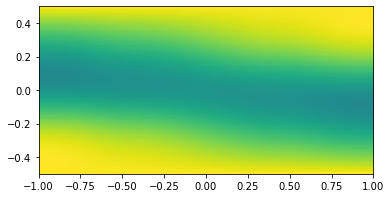

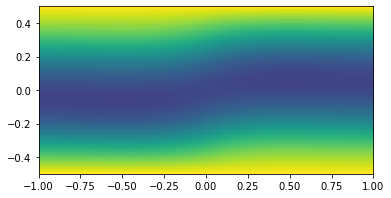

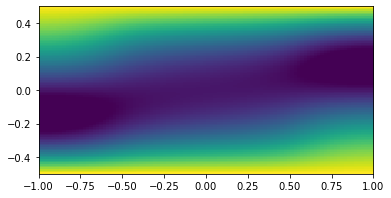

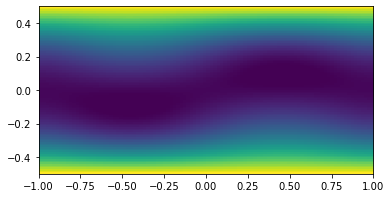

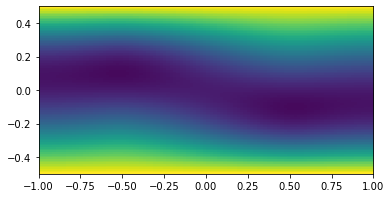

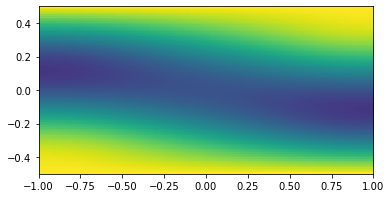

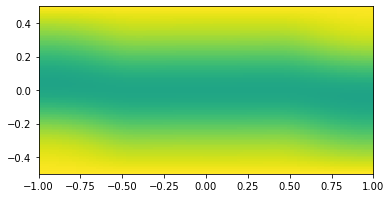

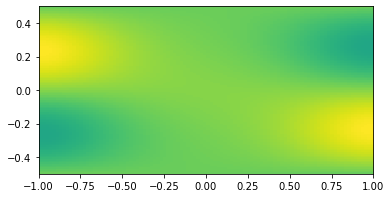

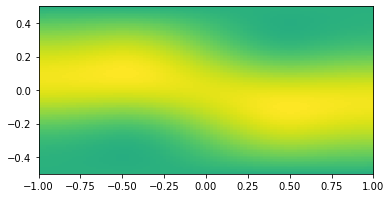

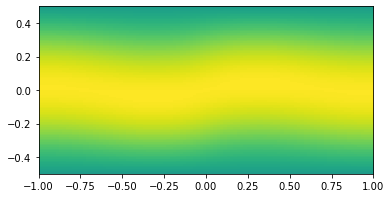

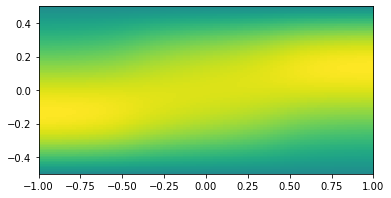

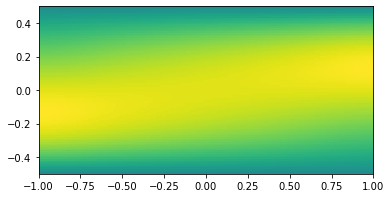

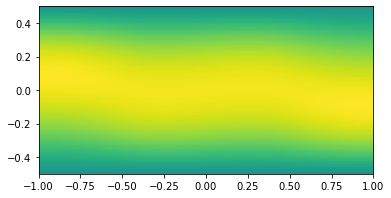

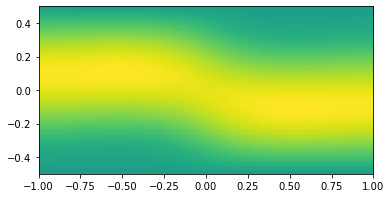

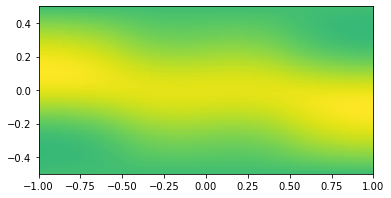

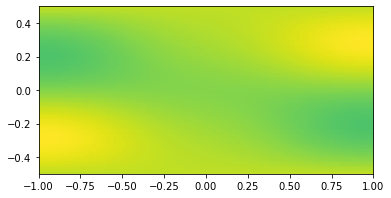

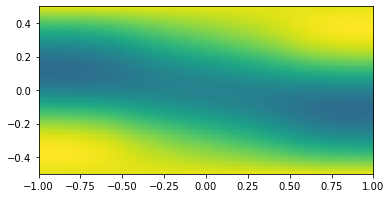

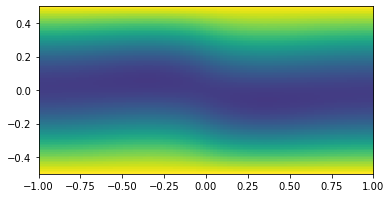

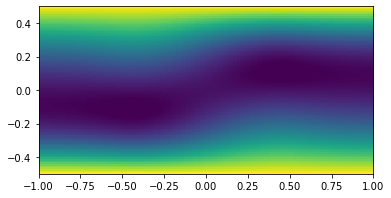

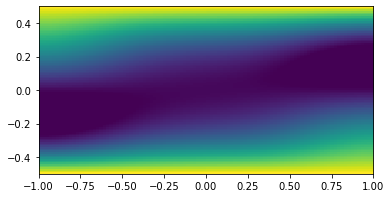

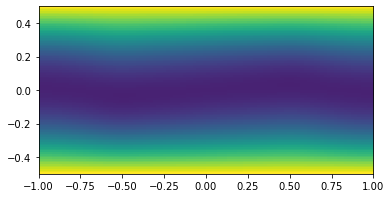

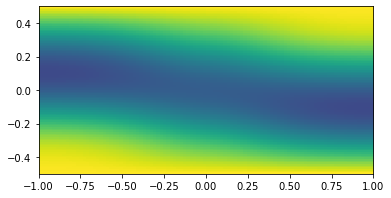

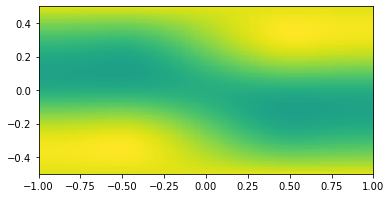

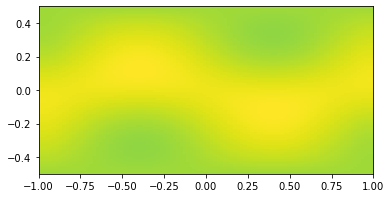

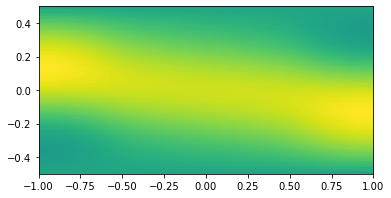

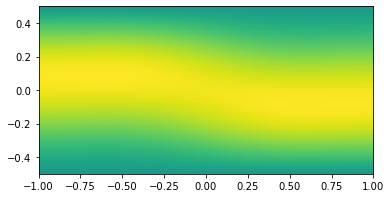

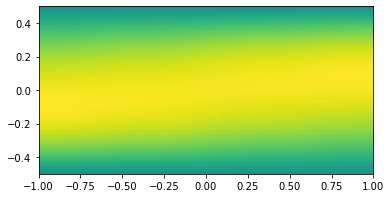

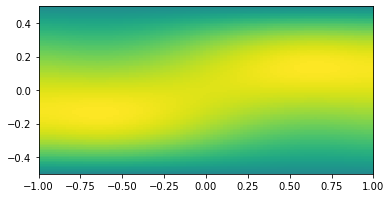

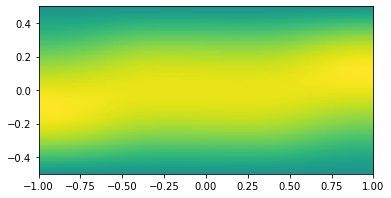

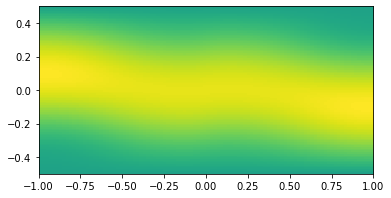

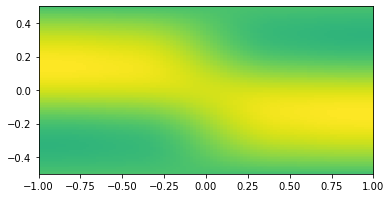

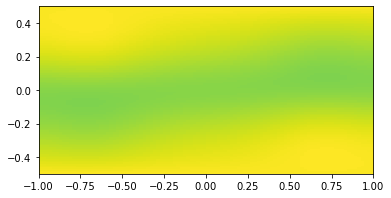

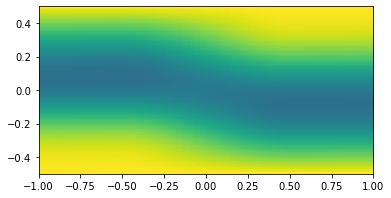

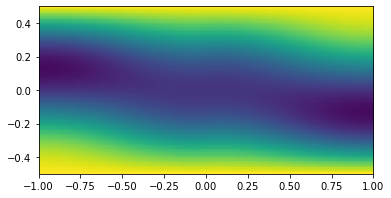

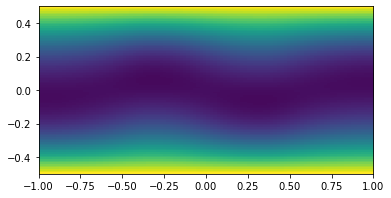

In [21]:
sol = solve2()

for i in range(0, NT, NT//40):
    plt.imshow(sol[i], vmin=-0.8, extent=(-a/2, a/2, -b/2, b/2))
    plt.show()